# Concrete Compressive Strength.

Compressive strength or compression strength is the capacity of a material or structure to withstand loads tending to reduce size, as opposed to tensile strength, which withstands loads tending to elongate.

Compressive strength is one of the most important engineering properties of concrete. It is a standard industrial practice that the concrete is classified based on grades. This grade is nothing but the Compressive Strength of the concrete cube or cylinder. Cube or Cylinder samples are usually tested under a compression testing machine to obtain the compressive strength of concrete. The test requisites differ country to country based on the design code.

Here is your Required [Data ](https://drive.google.com/file/d/1Csmy8fz4BDM70wD07XJYKPqOr8BAPfzE/view?usp=sharing)
# **Good Luck**

# 1. Loading Data

In [1]:
# Imports
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [2]:
os.chdir('F:\GIT\AI-Course-Python\AI-Python\PythonEnv1\ML\data')
df = pd.read_excel('Concrete_Data.xls')
df.columns = ['Cement','Blast','FlyAsh','Water','Superplasticizer','Coarse','FineAgg','Age','ConcreteStength']
df.head()

,Cement,Blast,FlyAsh,Water,Superplasticizer,Coarse,FineAgg,Age,ConcreteStength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


# 2. Data Pre-processing

## 2.1 Outliers Handling

***Univariants***

In [3]:
def find_outliers_tukey(x):    
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1 
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])

    return outlier_indices, outlier_values

In [4]:
# from statsmodels.nonparametric.kde import KDEUnivariate

# def find_outliers_kde(x):
#     x_scaled = scale(list(map(float, x)))
#     kde = KDEUnivariate(x_scaled)
#     kde.fit(bw="scott", fft=True)
#     pred = kde.evaluate(x_scaled)
    
#     n = sum(pred < 0.05)
#     outlier_ind = np.asarray(pred).argsort()[:n]
#     outlier_value = np.asarray(x)[outlier_ind]

#     return outlier_ind, outlier_value

In [5]:
# loop through all columns remove outliers, then drop rows
def removeOL_tukey(data):
    for x in data.columns:
        tukey_indices, tukey_values = find_outliers_tukey(data[x])
        data = data.replace(tukey_values, np.NaN)
        new_data = data.dropna()
    return new_data

In [6]:
# # loop through all columns remove outliers, then drop rows
# def removeOL_kde(data):
#     for x in data.columns:
#         tukey_indices, tukey_values = find_outliers_kde(data[x])
#         data = data.replace(tukey_values, npimport statsmodels.formula.api as sm
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x.NaN)
#         new_data = data.dropna()
#     return new_data

In [7]:
df = removeOL_tukey(df)
# df = removeOL_kde(df)import statsmodels.formula.api as sm
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x
df.describe()

,Cement,Blast,FlyAsh,Water,Superplasticizer,Coarse,FineAgg,Age,ConcreteStength
count,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000
mean,276.384281,73.440075,57.989378,180.649464,6.230370,974.858101,776.578433,32.440987,34.871478
std,102.050459,86.173029,64.409193,18.804219,5.347381,77.234149,75.239374,28.681400,16.523174
min,102.000000,0.000000,0.000000,127.000000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,190.340000,0.000000,0.000000,164.900000,0.000000,932.000000,740.575000,7.000000,22.696171
50%,259.950000,20.000000,0.000000,184.000000,6.860000,968.000000,780.000000,28.000000,33.398217
75%,349.000000,145.000000,118.382500,192.000000,10.300000,1030.250000,822.200000,28.000000,44.693558
max,540.000000,342.100000,200.100000,228.000000,22.100000,1145.000000,945.000000,120.000000,79.400056


***multivariants***

In [38]:
# # Z score
# def outliers_Zscore(data):
#     from scipy import stats
#     import numpy as np
#     z = np.abs(stats.zscore(data))import statsmodels.formula.api as sm
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x
#     # threshold = 3

#     data = data[(z < 3).all(axis=1)]
#     return data

In [39]:
# # Distance between Standard Deviation and Mean
# def outliers_meanStd(data):
#     return data.mask((data - data.mean()).abs() > 3 * df.std()).dropna()

In [40]:
# IQR score
def outliers_IQR(data):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    floor = Q1 - 1.5*IQR
    ceiling = Q3 + 1.5*IQR

    data = data[~((data < floor) | (data > ceiling)).any(axis=1)]
    return data

In [41]:
# df = outliers_Zscore(df)
# df = outliers_meanStd(df)
df = outliers_IQR(df)
df.describe()

,Cement,Blast,FlyAsh,Water,Superplasticizer,Coarse,FineAgg,Age,ConcreteStength
count,940.00,940.00,940.00,940.00,940.00,940.00,940.00,940.00,940.00
mean,275.78,73.83,58.00,180.60,6.24,974.93,776.57,32.38,34.89
std,101.94,86.40,64.39,18.75,5.34,77.60,75.11,28.57,16.60
min,102.00,0.00,0.00,127.00,0.00,801.00,594.00,1.00,2.33
25%,190.34,0.00,0.00,164.90,0.00,932.00,740.58,7.00,22.61
50%,255.50,20.00,0.00,183.80,6.93,968.00,780.00,28.00,33.40
75%,349.00,145.00,118.38,192.00,10.30,1031.50,822.20,28.00,44.69
max,540.00,342.10,200.10,228.00,22.10,1145.00,945.00,120.00,79.40


## 2.1 Binning (Bad for this model - Just for later reference)

In [42]:
# Take out the label before data binning -- for later use
# label_df= df.iloc[:,-1] 

# remove it from dataframe
# df.drop('ConcreteStength',inplace=True, axis=1)

In [43]:
# Convert Age into bins
# bins = [1, 30, 60, 120,300, 365]
# labels = ['1-29', '30-59', '60-119', '120-299', '300+']
# df['Age'] = pd.cut(df.Age, bins, labels = labels,include_lowest = True)

In [44]:
# One Hot Encoder
# use pd.concat to join the new columns with your original dataframe
# df = pd.concat([df,pd.get_dummies(df['Age'], prefix='Age')],axis=1)

# now drop the original 'country' column (you don't need it anymore)
# df.drop(['Age'],axis=1, inplace=True)

In [45]:
# return label to the dataframe for correlation view  -- So that we can view the correlation view after binning
# df = pd.concat([df,label_df],axis=1,names='ConcreteStength')

## 2.2 Features Selection

In [3]:
X =df.iloc[:,:-1]
y=df.iloc[:,-1]
features_matrix= X.values
label=y.values

### 1- Embedded Method (Lasso Regularization)
    Embedded methods are iterative in a sense that takes care of each iteration of the model training process 
    and carefully extract those features which contribute the most to the training for a particular iteration. 

    Regularization methods are the most commonly used embedded methods which penalize a feature given a coefficient threshold

    Here we will do feature selection using Lasso regularization. 
    If the feature is irrelevant, lasso penalizes it’s coefficient and make it 0. 
    Hence the features with coefficient = 0 are removed and the rest  are taken.

Best alpha using built-in LassoCV: 3.488843
Best score using built-in LassoCV: 0.767980
Lasso picked 7 variables and eliminated the other 1 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

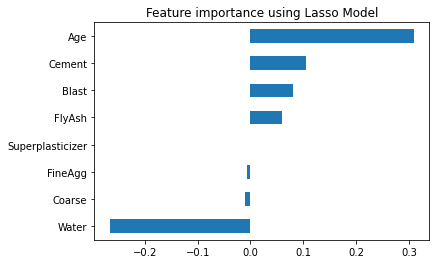

In [47]:
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_values()
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

### 2- Filter Method (Correlation Visualize)

Here we will first plot the Pearson correlation heatmap and see the correlation of independent variables with the output variable Concret Strength. 

We will only select features which has correlation of above 0.15 (taking absolute value) with the output variable.
The correlation coefficient has values between -1 to 1

1. A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
2. value closer to 1 implies stronger positive correlation
3. value closer to -1 implies stronger negative correlation

In [48]:
#draw correlation heat map to decide which is the lowest correlations
pd.set_option('precision', 2)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Cement,Blast,FlyAsh,Water,Superplasticizer,Coarse,FineAgg,Age,ConcreteStength
Cement,1.00,-0.26,-0.37,-0.09,0.03,-0.10,-0.24,-0.04,0.48
Blast,-0.26,1.00,-0.35,0.11,0.04,-0.29,-0.30,-0.04,0.14
FlyAsh,-0.37,-0.35,1.00,-0.25,0.45,-0.04,0.06,0.05,-0.05
Water,-0.09,0.11,-0.25,1.00,-0.64,-0.21,-0.36,-0.02,-0.37
Superplasticizer,0.03,0.04,0.45,-0.64,1.00,-0.22,0.11,0.05,0.40
Coarse,-0.10,-0.29,-0.04,-0.21,-0.22,1.00,-0.18,0.02,-0.17
FineAgg,-0.24,-0.30,0.06,-0.36,0.11,-0.18,1.00,0.05,-0.16
Age,-0.04,-0.04,0.05,-0.02,0.05,0.02,0.05,1.00,0.52
ConcreteStength,0.48,0.14,-0.05,-0.37,0.40,-0.17,-0.16,0.52,1.00


### 3- Wrapper Method

A wrapper method needs one machine learning algorithm and uses its performance as evaluation criteria. 

This means, you feed the features to the selected Machine Learning algorithm and based on the model performance you add/remove the features. 

This is an iterative and computationally expensive process but it is more accurate than the filter method.

***i. Backward Elimination***

    As the name suggest, we feed all the possible features to the model at first. 
    We check the performance of the model and then iteratively remove the worst performing features 
    one by one till the overall performance of the model comes in acceptable range.

    The performance metric used here to evaluate feature performance is pvalue. 
    If the pvalue is above 0.05 then we remove the feature, else we keep it.

    We will first run one iteration here just to get an idea of the concept and 
    then we will run the same code in a loop, which will give the final set of features.
    Here we are using OLS model which stands for “Ordinary Least Squares”. This model is used for performing linear regression.

In [49]:
#Backward Elimination

import statsmodels.api as sm

cols = list(X.columns)
pmax = 1

while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
        
selected_features_BE = cols
print(selected_features_BE)

['Cement', 'Blast', 'FlyAsh', 'Water', 'Superplasticizer', 'Age']


In [13]:
import statsmodels.api as sm
def backwardElimination_p(x, sl):
    numVars = len(list(x.columns))
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j] == maxVar):
                    x = np.delete(x, j, 1)
    print(regressor_OLS.summary())
    return x

def backwardElimination_pr(x, SL):
    numVars = len(list(x.columns))
    temp = np.zeros((50,6)).astype(int)
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues)
        adjR_before = regressor_OLS.rsquared_adj
        if maxVar > SL:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j] == maxVar):
                    temp[:,j] = x[:, j]
                    x = np.delete(x, j, 1)
                    tmp_regressor = sm.OLS(y, x).fit()
                    adjR_after = tmp_regressor.rsquared_adj
                    if (adjR_before >= adjR_after):
                        x_rollback = np.hstack((x, temp[:,[0,j]]))
                        x_rollback = np.delete(x_rollback, j, 1)
                        print (regressor_OLS.summary())
                        return x_rollback
                    else:
                        continue
    print(regressor_OLS.summary())
    return x

In [15]:
SL = 0.05
X_Modeled = backwardElimination_pr(X, SL)
X_Modeled

OLS Regression Results                                
Dep. Variable:        ConcreteStength   R-squared (uncentered):                   0.931
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              1729.
Date:                Tue, 17 Mar 2020   Prob (F-statistic):                        0.00
Time:                        10:38:17   Log-Likelihood:                         -3866.2
No. Observations:                1029   AIC:                                      7748.
Df Residuals:                    1021   BIC:                                      7788.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

,Cement,Blast,FlyAsh,Water,Superplasticizer,Coarse,FineAgg,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1024,166.0,259.7,0.0,183.2,12.7,858.8,826.8,28
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28


***ii. RFE (Recursive Feature Elimination)***

    The Recursive Feature Elimination (RFE) method works by recursively removing attributes and building a model on those attributes that remain.
    It uses accuracy metric to rank the feature according to their importance. 
    
    The RFE method takes the model to be used and the number of required features as input.
    It then gives the ranking of all the variables, 1 being most important.
    It also gives its support, True being relevant feature and False being irrelevant feature.

In [50]:
from sklearn.feature_selection import RFE
#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]

for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 30)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]

print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 8
Score with 8 features: 0.833919


    As seen from above code, the optimum number of features is 10. 
    We now feed 10 as number of features to RFE and get the final set of features given by RFE method, as follows:

In [51]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, nof) # number of features             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['Cement', 'Blast', 'FlyAsh', 'Water', 'Superplasticizer', 'Coarse',
       'FineAgg', 'Age'],
      dtype='object')


***Drop Columns and Re-split dataframe in np arrays***

In [52]:
# drop colums neglected by Lasso

df = df.drop(columns=['Superplasticizer'], axis=1)

In [53]:
# drop colums neglected by Correlation Heat map

# with low impact in label
# we will decide a threshhold of 0.15
# then we will remove Blast and FlyAsh
# Also we will drop Water and leave Superplasticizer as they are 
#   collerated with each other, and Superplasticizer is higher with the label

# df = df.drop(columns=['Water', 'Blast','FlyAsh'], axis=1)

In [54]:
# drop colums neglected by Backward Elimination and RFE

# df = df.drop(columns=['Coarse','FineAgg' ], axis=1)

In [55]:
X =df.iloc[:,:-1]
y=df.iloc[:,-1]
features_matrix= X.values
label=y.values

### >>>>>>>> Note

1. Filter method is less accurate. It is great while doing EDA, it can also be used for checking multi co-linearity in data.

2. Wrapper and Embedded methods give more accurate results but as they are computationally expensive,

    these method are suited when you have lesser features (~20).

## Building the Model

**1. Scale function**

define function for applying scaling on features

Parameters:

    1. X-training values
    2. X-testing values

Returns:

    1. X-training values - Scaled
    2. X-testing values - Scaled

In [56]:
def scaleFeatures(X_train,X_test):
    
    scaler = StandardScaler()
    # take a look how the values was before and after the scalling 
    print('Before scalling, max is %d and min is %d'%(np.max(X_train), np.min(X_train)))
    # Learn the paramters from X_train and  Transfrom  X_Train
    X_train = scaler.fit_transform(X_train)
    # Then transform X_test 
    X_test = scaler.transform(X_test)
    print('After scalling, max is %d and min is %d'%(np.max(X_train), np.min(X_train)))
    return X_train, X_test

**2. Regularization regressors function**

define function for applying the Regularization regressions [Ridge and Lasso] that returns

Parameters:

    1. X_Training as PolynomialFeatures
    2. X_Testing as PolynomialFeatures
    3. y-training values    
    4. y-testing values
    5. Method [Ridge or Lasso]

Returns:

    1. The prediciton 
    2. R-squared error value

In [89]:
def alphaRegulariz(x_poly_train_raw, x_poly_test_raw, y_train_raw, y_test_raw, method):
    bestError = None
    bestAlpha = None
    alphaValues = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20, 30]
    bestPred = None
    
    if method == 'Ridge':        

        for alphaVal in alphaValues:
            ridge = Ridge(alpha = alphaVal, normalize=True)
            ridge.fit(x_poly_train_raw, y_train_raw)
            y_pred = ridge.predict(x_poly_test_raw)

            errorValue = r2_score(y_test_raw,y_pred)

            if  bestError is None or bestError < errorValue:
                bestError = errorValue
                bestAlpha = alphaVal
                bestPred = y_pred

    elif method == 'Lasso':        

        for alphaVal in alphaValues:
            lasso = Lasso(alpha = alphaVal, normalize=True)
            lasso.fit(x_poly_train_raw, y_train_raw)
            y_pred = lasso.predict(x_poly_test_raw)

            errorValue = r2_score(y_test_raw,y_pred)

            if bestError is None or bestError < errorValue:
                bestError = errorValue
                bestAlpha = alphaVal
                bestPred = y_pred
 
    from sklearn.metrics import mean_absolute_error
    MAE = mean_absolute_error(y_test_raw, y_pred)

    from sklearn.metrics import mean_squared_error
    MSE = mean_squared_error(y_test_raw, y_pred)

    print(method, ' Error: ', bestError, ' ** MAE: ',  MAE, ' ** MSE: ', MSE, ' -- Best Alpha: ', bestAlpha)    
    return bestPred, bestError

**3. Linear regression function**

define function for applying the regular Linear regression

Parameters:

    1. X-training values
    2. X-testing values
    3. y-training values    
    4. y-testing values

Returns:

    1. The prediciton 
    2. R-squared error value

In [90]:
def regularLinear(X_train_raw, X_test_raw, y_train_raw, y_test_raw):
    lr = LinearRegression()
    lr.fit(X_train_raw,y_train_raw)

    y_pred = lr.predict(X_test_raw)

    Er_lr = r2_score(y_test_raw,y_pred)

    from sklearn.metrics import mean_absolute_error
    MAE = mean_absolute_error(y_test_raw, y_pred)

    from sklearn.metrics import mean_squared_error
    MSE = mean_squared_error(y_test_raw, y_pred)
    print('Linear Error: ', Er_lr, ' ** MAE: ',  MAE, ' ** MSE: ', MSE)
    return y_pred, Er_lr

**4. Best Regressor**

define the main function for applying all regressions and choose the highest error value, also it will draw the regressors prediction graphs


Parameters:

    1. X Values
    2. y Values
    3. random seed

In [91]:
def bestRegressor(X,y,xr=42):
    
    # 0- Split
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = xr, shuffle = True )

    # 0.1- Scale features
    X_train,X_test = scaleFeatures(X_train,X_test)
    print('\n')

    # 1- Linear Regression
    linear_pred, linear_error  = regularLinear( X_train, X_test, y_train, y_test)

    # 2- Find Ridge & Lasso
    ridge_pred, ridge_error = alphaRegulariz(X_train, X_test, y_train, y_test, 'Ridge')
    lasso_pred, lasso_error = alphaRegulariz(X_train, X_test, y_train, y_test, 'Lasso')
    print('\n')

    # 3- Print best r2 error
    r2_errors = {linear_error:"linear",ridge_error:"ridge",lasso_error:"lasso"}
    preds = {"linear":linear_pred,"ridge":ridge_pred,"lasso":lasso_pred}

    bestPred = preds.get(r2_errors.get(max(r2_errors)))
    
    print('Best regression: ', r2_errors.get(max(r2_errors)), ' -- with error r2: ', max(r2_errors))
    print('\n')

    # 4- Draw Graphs

    # Linear 
    plt.plot(np.sort(y_test),'.', np.sort(linear_pred),'-' )
    plt.title('Linear Regression %s' % ( round(linear_error *100,2) ))
    plt.show()

    # Ridge 
    plt.plot(np.sort(y_test),'.', np.sort(ridge_pred),'-')
    plt.title('Ridge Regression %s' % (round(ridge_error *100,2)))
    plt.show()

    # Lasso 
    plt.plot(np.sort(y_test),'.', np.sort(lasso_pred),'-')
    plt.title('Lasso Regression %s' % (round(lasso_error *100,2)))
    plt.show()

    return max(r2_errors)

## Train and test the model

Before scalling, max is 1145 and min is 0
After scalling, max is 3 and min is -2


Linear Error:  0.8309606080050327  ** MAE:  5.459024790945785  ** MSE:  51.606360273148134
Ridge  Error:  0.8310400657736183  ** MAE:  14.090730007186997  ** MSE:  294.87144413935204  -- Best Alpha:  0.001
Lasso  Error:  0.8309606080050324  ** MAE:  14.424715302958587  ** MSE:  308.6308312739438  -- Best Alpha:  1e-15


Best regression:  ridge  -- with error r2:  0.8310400657736183




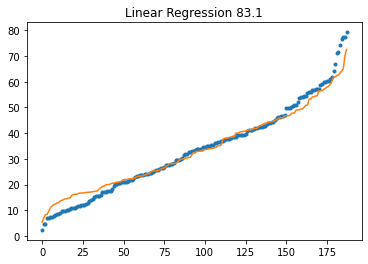

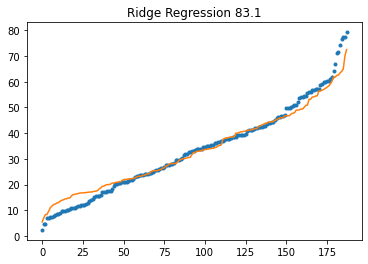

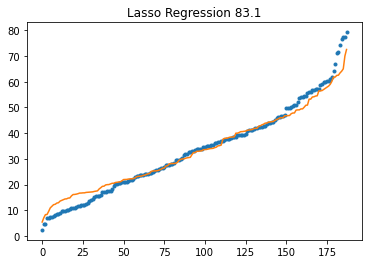

In [92]:
bestPred = bestRegressor(features_matrix,label,30) 